# 1. MNIST 데이터셋

In [1]:
from tensorflow.keras.datasets.mnist import load_data

In [2]:
(x_train,y_train), (x_test, y_test) = load_data(path='mnist.npz')

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [4]:
print(y_train)

[5 0 4 ... 5 6 8]


In [5]:
print(x_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


In [6]:
print(y_test)

[7 2 1 ... 4 5 6]


# 2. 데이터그리기

In [7]:
import matplotlib.pyplot as plt
import numpy as np

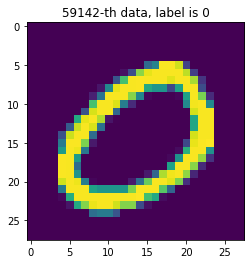

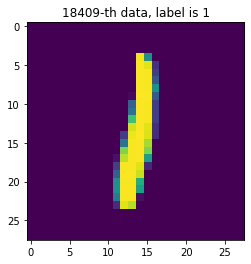

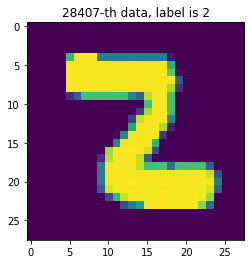

In [8]:
sample_size = 3
random_idx = np.random.randint(60000, size=sample_size)

for idx in random_idx:
    img = x_train[idx, :]
    label = y_train[idx]
    plt.figure()
    plt.imshow(img)
    plt.title('%d-th data, label is %d' % (idx,label))

# 3. 검증 데이터 만들기

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state=777)
print(f'훈련데이터 {x_train.shape} 레이블{y_train.shape}')
print(f'검증데이터 {x_val.shape} 레이블{y_val.shape}')

훈련데이터 (42000, 28, 28) 레이블(42000,)
검증데이터 (18000, 28, 28) 레이블(18000,)


# 4. 모델입력을 위한 데이터 전처리

In [11]:
num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

x_train = (x_train.reshape((num_x_train, 28 * 28))) / 255
x_val = (x_val.reshape((num_x_val, 28 * 28))) / 255
x_test = (x_test.reshape((num_x_test, 28 * 28))) / 255

print(x_train.shape)

(42000, 784)


- 레이블 전처리

In [12]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(y_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# 5. 모델 구성하기

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# 784차원의 데이터 입력받고, 64개의 출력
model.add(Dense(64, activation = 'relu', input_shape = (784, )))
# 32개 출력
model.add(Dense(32, activation = 'relu'))
# 10개 출력
model.add(Dense(10, activation = 'softmax'))

# 6. softmax와 sigmoid 값의 비교

In [14]:
def softmax(arr):
    m = np.max(arr)
    arr = arr - m
    arr = np.exp(arr)
    return arr / np.sum(arr)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

case_1 = np.array([3.1, 3.0, 2.9])
case_2 = np.array([2.0, 1.0, 0.7])

np.set_printoptions(precision=3) # numpy 소수점 제한
print(f'sigmoid {sigmoid(case_1)}, softmax {softmax(case_1)}')
print(f'sigmoid {sigmoid(case_2)}, softmax {softmax(case_2)}')    

sigmoid [0.957 0.953 0.948], softmax [0.367 0.332 0.301]
sigmoid [0.881 0.731 0.668], softmax [0.61  0.224 0.166]


# 7. compile 설정(학습과정)

In [16]:
model.compile(optimizer = 'adam', # adam의 기본학습률 0.001
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

# 8. 모델 학습

In [17]:
history = model.fit(x_train, y_train,
                   epochs = 30,
                   batch_size = 128,
                   validation_data = (x_val, y_val))

Epoch 1/30
329/329 [==============================] - 1s 3ms/step - loss: 0.4907 - acc: 0.8595 - val_loss: 0.2631 - val_acc: 0.9249
Epoch 2/30
329/329 [==============================] - 1s 2ms/step - loss: 0.2166 - acc: 0.9373 - val_loss: 0.1955 - val_acc: 0.9447
Epoch 3/30
329/329 [==============================] - 1s 2ms/step - loss: 0.1699 - acc: 0.9505 - val_loss: 0.1647 - val_acc: 0.9533
Epoch 4/30
329/329 [==============================] - 1s 2ms/step - loss: 0.1365 - acc: 0.9605 - val_loss: 0.1502 - val_acc: 0.9572
Epoch 5/30
329/329 [==============================] - 1s 2ms/step - loss: 0.1137 - acc: 0.9669 - val_loss: 0.1346 - val_acc: 0.9616
Epoch 6/30
329/329 [==============================] - 1s 2ms/step - loss: 0.0967 - acc: 0.9719 - val_loss: 0.1290 - val_acc: 0.9622
Epoch 7/30
329/329 [==============================] - 1s 2ms/step - loss: 0.0842 - acc: 0.9756 - val_loss: 0.1164 - val_acc: 0.9658
Epoch 8/30
329/329 [==============================] - 1s 2ms/step - loss: 0.

In [18]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

# 9. 학습결과 그려보기

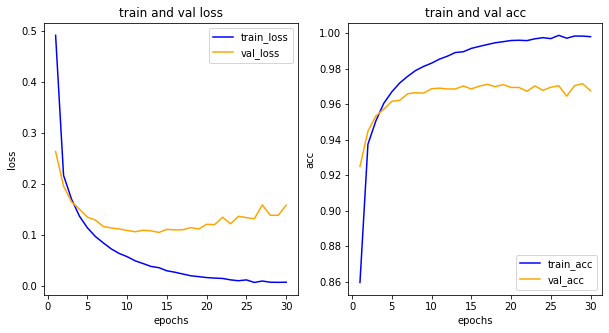

In [23]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']
epochs = range(1, len(loss) +1)
fig = plt.figure(figsize= (10, 5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

# 10. 정답 비교

- 모델 평가

In [24]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 927us/step - loss: 0.1517 - acc: 0.9703


[0.1517040878534317, 0.970300018787384]

- 학습된 모델 값예측

In [25]:
import numpy as np

results = model.predict(x_test)
print(results.shape)
np.set_printoptions(precision=7)
print(f'각 클래스에 속할 확률 : \n{results [0]}')

313/313 [==============================] - 0s 779us/step
(10000, 10)
각 클래스에 속할 확률 : 
[1.6944630e-09 2.4585174e-16 6.7945005e-10 8.8737471e-09 8.4094955e-20
 2.5557602e-13 3.3936094e-21 1.0000000e+00 1.6827937e-13 9.9716083e-11]


- 예측값 그려서 확인

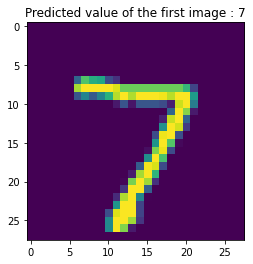

In [26]:
import matplotlib.pyplot as plt

arg_results = np.argmax(results, axis = -1) # -1 인덱스축
plt.imshow(x_test[0].reshape(28, 28))
plt.title('Predicted value of the first image : ' + str(arg_results[0]))
plt.show()

- 평가방법1. 혼동행렬

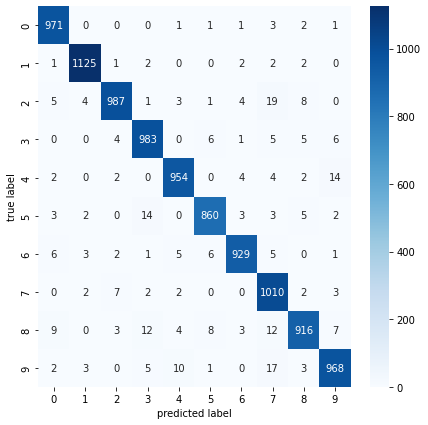

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (7,7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [31]:
np.argmax(y_test, axis = -1)

array([ 3,  2,  1, 18,  4,  8, 11,  0, 61,  7], dtype=int64)

In [38]:
y_test[:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [37]:
y_test.shape

(10000, 10)

In [34]:
np.argmax(y_test, axis = 0)

array([ 3,  2,  1, 18,  4,  8, 11,  0, 61,  7], dtype=int64)

In [35]:
np.argmax(y_test, axis = 1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [36]:
np.argmax(y_test)

7

In [46]:
np.argmax(results, axis = -1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [47]:
results.shape

(10000, 10)

In [41]:
confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))

array([[ 971,    0,    0,    0,    1,    1,    1,    3,    2,    1],
       [   1, 1125,    1,    2,    0,    0,    2,    2,    2,    0],
       [   5,    4,  987,    1,    3,    1,    4,   19,    8,    0],
       [   0,    0,    4,  983,    0,    6,    1,    5,    5,    6],
       [   2,    0,    2,    0,  954,    0,    4,    4,    2,   14],
       [   3,    2,    0,   14,    0,  860,    3,    3,    5,    2],
       [   6,    3,    2,    1,    5,    6,  929,    5,    0,    1],
       [   0,    2,    7,    2,    2,    0,    0, 1010,    2,    3],
       [   9,    0,    3,   12,    4,    8,    3,   12,  916,    7],
       [   2,    3,    0,    5,   10,    1,    0,   17,    3,  968]],
      dtype=int64)

- 평가방법2. 분류보고서

In [48]:
print(classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.98      0.97      0.98       958
           7       0.94      0.98      0.96      1028
           8       0.97      0.94      0.95       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

